In [1]:
import torch
from package import MolecularGraphNeuralNetwork, plot_fit_confidence_bond
from preprocess import create_datasets
from sklearn.metrics import r2_score
device = torch.device('cpu')

In [2]:
dataset, property = 'smtr', 'e(kcalmol^-1)'
(dataset_train, idx_train, dataset_val, idx_val, dataset_test, idx_test, N_atoms) = create_datasets(dataset, property, device)
# idx_train

data_train.txt
data_test.txt


In [3]:

dim = 12
layer_hidden = 24
layer_output = 12


model = MolecularGraphNeuralNetwork(
            N_atoms, dim, layer_hidden, layer_output, device=device).to(device)
model.load_state_dict(torch.load('../model/test_128_0.0001_24_12_2022-05-09-15-00-16.params'))
# model.eval()

<All keys matched successfully>

In [6]:
val_batch = list(zip(*dataset_val))
train_batch = list(zip(*dataset_train[:160]))
test_bath = list(zip(*dataset_test))
_, ts_val, ys_val = model(val_batch, train=False)
_, ts_train, ys_train = model(train_batch, train=False)
_, ts_test, ys_test = model(test_bath, train=False)

r2_val = r2_score(ts_val, ys_val)
r2_train = r2_score(ts_train, ys_train)
r2_test = r2_score(ts_test, ys_test)

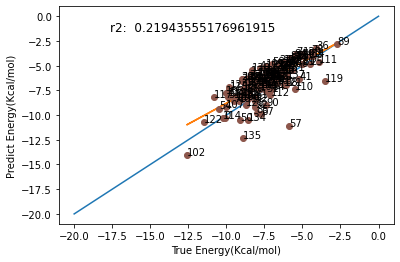

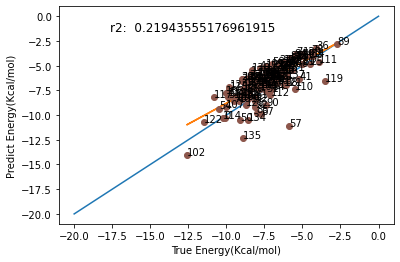

In [8]:
plot_fit_confidence_bond(ts_val, ys_val, r2_val)


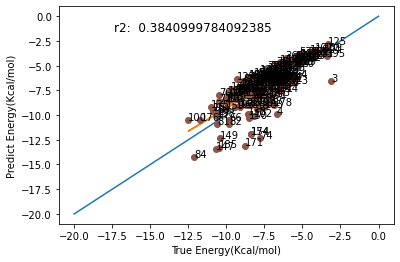

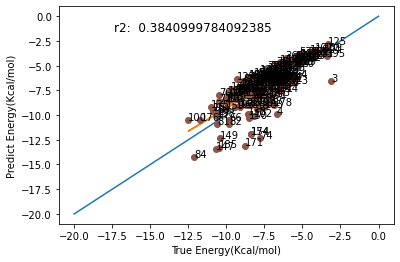

In [9]:
plot_fit_confidence_bond(ts_test, ys_test, r2_test)

In [11]:
[idx_val[i] for i in (102, 135, 57, 119)]

[tensor([[1.0000e+06, 1.5211e+00, 2.4910e+00,  ..., 5.7133e+00, 4.9208e+00,
          2.4663e+00],
         [1.5211e+00, 1.0000e+06, 1.5226e+00,  ..., 5.8540e+00, 4.8203e+00,
          1.5133e+00],
         [2.4910e+00, 1.5226e+00, 1.0000e+06,  ..., 7.1688e+00, 6.1730e+00,
          2.4545e+00],
         ...,
         [5.7133e+00, 5.8540e+00, 7.1688e+00,  ..., 1.0000e+06, 1.3713e+00,
          4.8284e+00],
         [4.9208e+00, 4.8203e+00, 6.1730e+00,  ..., 1.3713e+00, 1.0000e+06,
          3.8098e+00],
         [2.4663e+00, 1.5133e+00, 2.4545e+00,  ..., 4.8284e+00, 3.8098e+00,
          1.0000e+06]], device='cuda:0'),
 tensor([[1.0000e+06, 1.0095e+00, 2.0597e+00,  ..., 3.0677e+00, 3.0859e+00,
          3.6727e+00],
         [1.0095e+00, 1.0000e+06, 1.6467e+00,  ..., 2.4329e+00, 2.3789e+00,
          3.3540e+00],
         [2.0597e+00, 1.6467e+00, 1.0000e+06,  ..., 1.6409e+00, 2.5717e+00,
          2.3442e+00],
         ...,
         [3.0677e+00, 2.4329e+00, 1.6409e+00,  ..., 1.0000e+06